# QWERTY effect for RedTube videos

In [1]:
require(xtable,quietly = T)
source("DecodingFunctions.R")
options(warn=-1)

dsname <- "RedTube"
msg <- "RedTube videos"
load("RedTube/df.RData")

In [3]:
nprods <- length(df$V)
avgRating <- mean(df$V)
avgRSR <- mean(df$RSR)
dfstats <- data.frame(nprods, avgRating, avgRSR)
  colnames(dfstats) <- c("Number of videos", "Mean likes ratio", "mean RSR")
  row.names(dfstats) <- ""

xtable(x=dfstats, caption=paste("Data summary for", msg), digits=10, comment=FALSE)

,Number of videos,Mean likes ratio,mean RSR
,351677,0.7037591,0.4225202


In [4]:
#Run this only if you have time!
linModels(df, dsname)

In [5]:
#Run this only if you have time!
rndLinModels(df, dsname, nrep=10000, verbose=FALSE)
bootLinModels(df, dsname, nrep=10000, verbose=FALSE)

In [6]:
#Run this only if you have time!
calcPlotDataSimple(df, dsname)
runsfolder <- paste(dsname, "rundata", sep="-")
load(file=paste(runsfolder, "PlotDataSimple.RData", sep="/"))
load(file=paste(runsfolder, "RndEsts.RData", sep="/"))
load(file=paste(runsfolder, "Boot.RData", sep="/"))

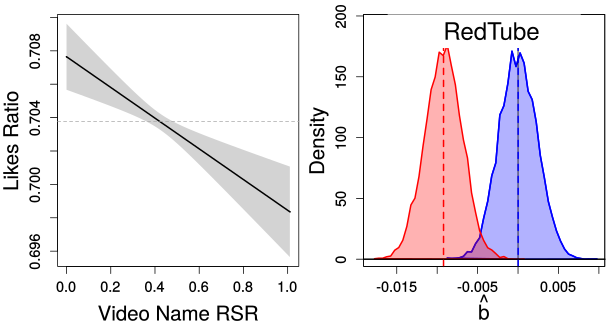

In [7]:
options(repr.plot.width=8.5, repr.plot.height=4.5)
options(jupyter.plot_mimetypes = 'image/svg+xml')
plotLM(plotData, rests, bests, xlab="Video Name RSR", ylab="Likes Ratio", booted=TRUE, coords=c(mean(df$RSA), mean(df$V)))
legend(x="top","RedTube", box.lty=0, box.lwd=0, bg="white", cex=2)

In [13]:
dfcontrols <- data.frame(df$nameLen, df$nwords, df$avgLetterFreq, df$avgWordFreq, df$t)
linModelsControl(df$V, df$RSR, dfcontrols, dsname)

In [14]:
load(paste(runsfolder,"LinModel.RData", sep="/"))
load(paste(runsfolder,"LinModelNorm.RData", sep="/"))
load(file=paste(runsfolder,"LinModelRobust.RData",sep="/"))
load(file=paste(runsfolder,"LinModelControl.RData",sep="/"))

In [15]:
suppressMessages(library(stargazer))

names(linModel$coefficients) <- c( "1", "RSR")
names(linModelNorm$coefficients) <- c( "1", "RSR")
names(linModelRobust$coefficients) <- c( "1", "RSR")
names(linModelControl$coefficients) <- c( "1", "RSR")

Controls: number of letters, average letter frequency, number of words, average word frequency, number of views, number of comments, number of evaluations, date

In [16]:
stargazer(linModel, linModelNorm, linModelRobust,linModelControl, style="asr", digits=4, keep.stat=c("rsq", "n"), model.numbers=F, omit.table.layout="dm", column.labels=c("OLS", "Normalized", "Robust (MM)", "Residualized"), title=paste("Regression results for", msg), digit.separator=".", type="text")


Regression results for RedTube videos
--------------------------------------------------
       OLS     Normalized Robust (MM) Residualized
--------------------------------------------------
1   0.7076***   -0.0000    0.7246***   0.0035***  
RSR -0.0092*** -0.0067*** -0.0080***   -0.0083*** 
N    351.677    351.677     351.677     351.677   
R2   0.00004    0.00004     0.00004     0.00004   
--------------------------------------------------
*p < .05; **p < .01; ***p < .001                  


In [17]:
load(file=paste(runsfolder,"LinModel.RData",sep="/"))
load(file=paste(runsfolder,"LinModelRobust.RData",sep="/"))
load(file=paste(runsfolder,"RndEsts.RData",sep="/"))
load(file=paste(runsfolder,"Boot.RData",sep="/"))
load(file=paste(runsfolder,"SpearmanBoot.RData",sep="/"))
statsTable(dsname, linModel, bests, rests, rhoests, linModelRobust, msg=msg)

,t test p-value,bootstrap p-value,permutation p-value,Spearman p-value,robust p-value
,7.160437e-05,0.9999,1,0.9995,0.0002852776
